In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def convert_2_indicator(Yin) :
    N = len(Yin)
    K = np.max(Yin) + 1
    Yout = np.zeros((N, K))
    for n in range(N) :
        Yout[n, Yin[n]] = 1
    return Yout

def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

def softmax(a) :  #shape of a = N X M
    aExp = np.exp(a)
    return aExp / aExp.sum(axis =1, keepdims= True)

def forward(X, W1, b1, W2, b2) :
    alpha = (X.dot(W1) + b1)
    z = sigmoid(alpha) #shape of z = N X M, W2 = M X K
    a = z.dot(W2) + b2  #shape of a = N X M
    y = softmax(a)
    return y, z

def derivate_w2(Z, T, Y) :
    N, K = T.shape
    M = Z.shape[1]
    
    #slow way-1
#     ret1 = np.zeros((M, K))
#     for n in range(N) :
#         for m in range(M):
#             for k in range(K) :
#                 ret1[m][k] += (T[n][k] - Y[n][k]) * Z[n][m]  #t-y since gradient ascent
                
    
    #slow-way2
#     ret2 = np.zeros((M, K))
#     for n in range(N) :
#         for k in range(K):
#             ret2[:, k] += (T[n, k] - Y[n, k]) * Z[n, :]  #2 id column array on both sides
            
#     assert(np.abs(ret1 - ret2).sum() < 10e-10)

    #slow -way3
#     ret3 = np.zeros((M, K))
#     for n in range(N) :
#         ret3 += np.outer(Z[n], T[n] - Y[n])
            
#     assert(np.abs(ret2 - ret3).sum() < 10e-10)
    
#     ret4 = Z.T.dot(T - Y)
#     assert(np.abs(ret3 - ret4).sum() < 10e-10)
#     return ret4
    
    return Z.T.dot(T - Y)

def derivate_b2(T, Y) :
    return np.sum(T - Y, axis = 0)

def derivate_w1(X, Z, T, Y, W2):
    #slow way1
#     N, D = X.shape
# #     K = Y.shape[1]
# #     M = Z.shape[1]
#     M, K = W2.shape
#     ret1 = np.zeros((D, M))
    
#     #slow way-1
#     for n in range(N):
#         for k in range(K):
#             for m in range(M) :
#                 for d in range(D) :
#                     ret1[d, m] += (T[n,k] - Y[n, k]) * W2[m, k] * Z[n, m] * (1 - Z[n, m]) * X[n, d]
                    
#     return ret1
    #fast way
    return X.T.dot((T - Y).dot(W2.T)* Z * (1 - Z))

def derivate_b1(T, Y, W2, Z) :
    return np.sum((T - Y).dot(W2.T) * Z * (1 - Z), axis = 0)

def cost(T, Y) :
    return  (T * np.log(Y)).sum()  #element wise multiplication

def classification_rate(T, Y) :
    T_labels = np.argmax(T, axis = 1)
    Y_labels = np.argmax(Y, axis = 1)
    return (T_labels == Y_labels).mean()

In [30]:
def main() :

    N_each_class = 500
    D = 2
    M = 3 #no  of hidden nodes
    K = 3 #no of classes
    N = N_each_class * K

    X = np.random.randn(N, D)
    X[:N_each_class] += np.array([0, -2])
    X[N_each_class:N_each_class*2] += np.array([2, 2])
    X[N_each_class*2:N_each_class*3] += np.array([2, -2])

    T = np.array([0] * N_each_class + [1] * N_each_class + [2] * N_each_class)
    T= convert_2_indicator(T)

    plt.scatter(X[:,0], X[:, 1], c = T, s = 10)
    plt.show()
    
    #randomly initalizing the weights
    W1 = np.random.randn(D, M) / np.sqrt(M * D)
    b1 = np.random.randn(M) / np.sqrt(M)
    W2 = np.random.randn(M, K) / np.sqrt(M * K)
    b2 = np.random.rand(K) / np.sqrt(K)
    
    costs = []
    learning_rate = 10e-7
    epochs = 200000
    
    
    for epoch in range(epochs) :
        Y, Z = forward(X, W1, b1, W2, b2)
        if epoch % 500 == 0:
            c = cost(T, Y)
            costs.append(c)
            print(c)
            
        W2 += learning_rate * derivate_w2(Z, T, Y)
        b2 += learning_rate * derivate_b2(T, Y)
        W1 += learning_rate * derivate_w1(X, Z, T, Y, W2)
        b1 += learning_rate * derivate_b1(T, Y, W2, Z)

    plt.figure()
    plt.plot(costs)
    plt.show()
    
    print('Final classification rate : ', classification_rate(T, Y))

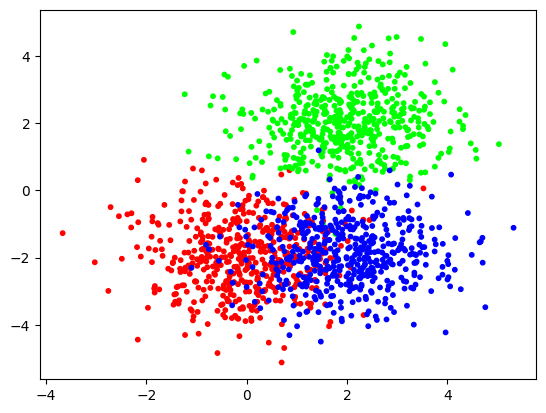

-1659.4774400171207
-1600.2697133890156
-1548.626219415588
-1497.0869785943835
-1443.5302739967697
-1388.4058747237168
-1333.1505991475394
-1279.2758941523693
-1227.9375247686398
-1179.8265182179691
-1135.2282551178184
-1094.1388601179563
-1056.3786554323683
-1021.6795943843842
-989.743764943096
-960.2781851986946
-933.0128438658596
-907.7080397259747
-884.1554855646543
-862.1761636816925
-841.6167849572017
-822.3459147375278
-804.2503175415081
-787.2317613913887
-771.204346225402
-756.0923303299037
-741.8283896512114
-728.3522344225286
-715.6095115024152
-703.550930786612
-692.1315654740615
-681.3102866342159
-671.0493015685663
-661.313772718793
-652.0714995053331
-643.2926497577332
-634.9495306081101
-627.0163911139479
-619.4692506616586
-612.2857485366724
-605.4450110484595
-598.9275333577164
-592.7150737318593
-586.790558400472
-581.1379955280445
-575.7423970918039
-570.5897076656199
-565.6667392802038
-560.961111665028
-556.4611972860719
-552.1560706813854
-548.0354616679145
-544.

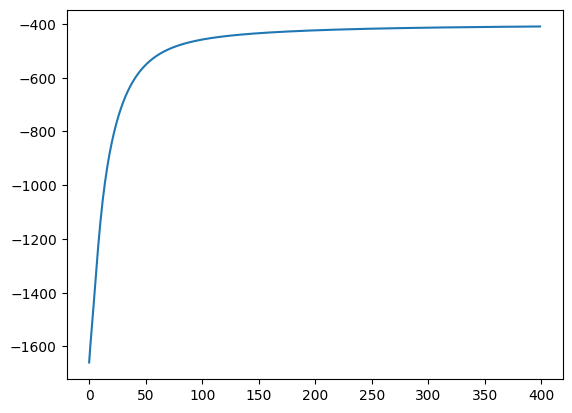

Final classification rate :  0.89


In [31]:
if __name__ == "__main__" :
    main()

In [63]:
np.array([[2, 3], [4, 3]]).argmax(axis = 1)

array([1, 0], dtype=int64)

In [5]:
x = np.array([[1, 2], [3, 4]])


1